In [ ]:
import warnings
warnings.simplefilter("ignore")

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from scipy import stats
import numpy as np

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier

**Read data**

In [ ]:
data = pd.read_csv("young_age.csv", sep=",")
data.head(10)

**Analize attributes of dataset**

In [ ]:
plt.figure(figsize=(14, 14))
sns.heatmap(data.corr(),annot=True,fmt='.1f')
plt.show()

In [ ]:
data.target.value_counts()

In [ ]:
sns.countplot(x="target", data=data)
plt.show()

__--__ Find _missing value_

In [ ]:
data.info()

In [ ]:
data.describe()

### 2. Statistics

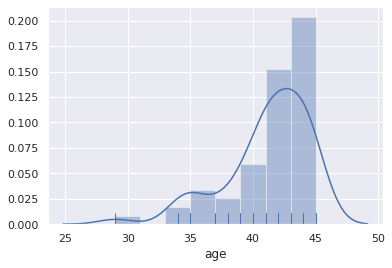

In [ ]:
sns.distplot(data['age'],rug=True)
plt.show()

__Sex distribution in data__

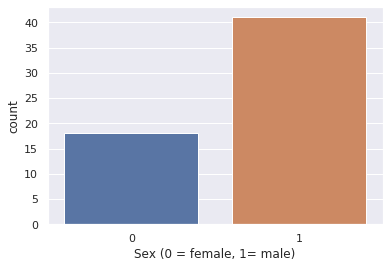

In [ ]:
sns.countplot(x='sex', data=data)
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

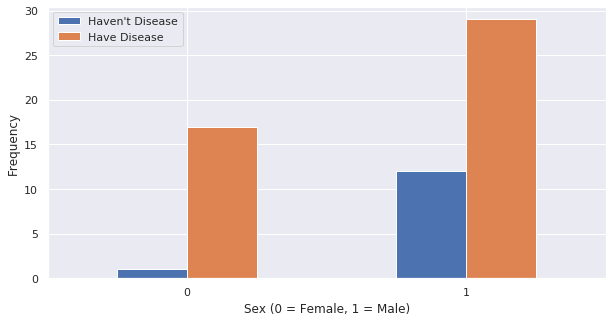

In [ ]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(10,5))
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

### 4. Data Proccess

__--__ Creating Dummy Variables

In [ ]:
data = pd.get_dummies(data, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [ ]:
data.shape

(59, 28)

__--__ Fit data to Standart Scaler

In [ ]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data[columns_to_scale] = standardScaler.fit_transform(data[columns_to_scale])

In [ ]:
data.head(10)

### 5. Train Model

#### Prepare data to train

In [ ]:
x = data.drop(['target'], axis=1)
y = data['target']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#### Logistic regression

In [ ]:
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print("Training accuracy: {}".format(model_lr.score(x_train, y_train)))
predicted_lr = model_lr.predict(x_test)
print("Testing accuracy:  {}".format(metrics.accuracy_score(y_test, predicted_lr)))

Training accuracy: 0.9574468085106383
Testing accuracy:  0.9166666666666666


In [ ]:
probabilities_lr = model_lr.predict_proba(x_test)
probabilities_lr

array([[0.10210387, 0.89789613],
       [0.10125859, 0.89874141],
       [0.01658004, 0.98341996],
       [0.10497973, 0.89502027],
       [0.01174876, 0.98825124],
       [0.84583739, 0.15416261],
       [0.74044948, 0.25955052],
       [0.33834178, 0.66165822],
       [0.83709316, 0.16290684],
       [0.0040244 , 0.9959756 ],
       [0.47652142, 0.52347858],
       [0.19172983, 0.80827017]])

#### Decision Tree Classifier

This classifier creates a decision tree based on which, it assigns the class values to each data point.


In [ ]:
dt_scores = []
for i in range(1, len(x.columns)+1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 42)
    dt_classifier.fit(x_train, y_train)
    dt_scores.append([dt_classifier.score(x_test, y_test), i])

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

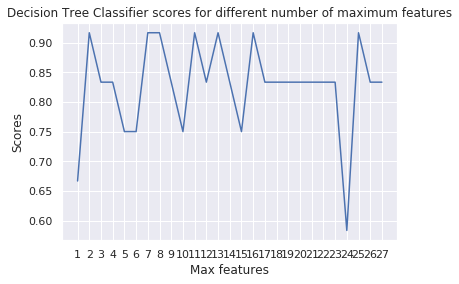

In [ ]:
x_ax = [i for i in range(1, len(x.columns) + 1)]
y_ax = [i[0] for i in dt_scores]
plt.plot(x_ax, y_ax)

plt.xticks([i for i in range(1, len(x.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')

plt.title('Decision Tree Classifier scores for different number of maximum features')

In [ ]:
dt = DecisionTreeClassifier(max_features = 17, random_state = 42)
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=17, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [ ]:
print("Training accuracy: {}".format(dt.score(x_train, y_train)))
predicted_dt = dt.predict(x_test)
print("Testing accuracy:  {}".format(metrics.accuracy_score(y_test, predicted_dt)))

Training accuracy: 1.0
Testing accuracy:  0.8333333333333334


Also, I can plot a line graph and see the effect of the number of features on the model score. 

#### K Neighbors Classifier

This classifier looks for the classes of K nearest neighbors of a given data point and based on the majority class, it assigns a class to this data point.

In [ ]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(x_train, y_train)
    knn_scores.append([knn_classifier.score(x_test, y_test), k])

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

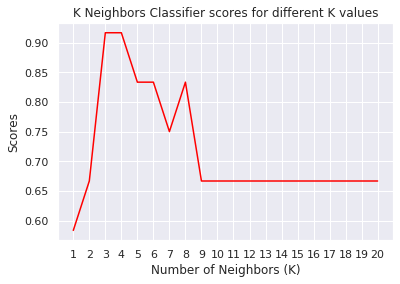

In [ ]:
x_axes = [k for k in range(1, 21)]
y_axes = [i[0] for i in knn_scores]
plt.plot(x_axes,y_axes, color = 'red')
    
plt.xticks([i for i in range(1, 21)])

plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')

plt.title('K Neighbors Classifier scores for different K values')

In [ ]:
print("Final score:", knn_scores[-1])

Final score: [0.6666666666666666, 20]


In [ ]:
print("The best score:", max(knn_scores))

The best score: [0.9166666666666666, 4]


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [ ]:
print("Training accuracy: {}".format(knn.score(x_train, y_train)))
predicted_knn = knn.predict(x_test)
print("Testing accuracy:  {}".format(metrics.accuracy_score(y_test, predicted_knn)))

Training accuracy: 0.7872340425531915
Testing accuracy:  0.8333333333333334
